In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# LOADING AND SPLITING THE DATASET
# https://www.cs.toronto.edu/~kriz/cifar.html --> dataset documentation

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalizing pixels values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

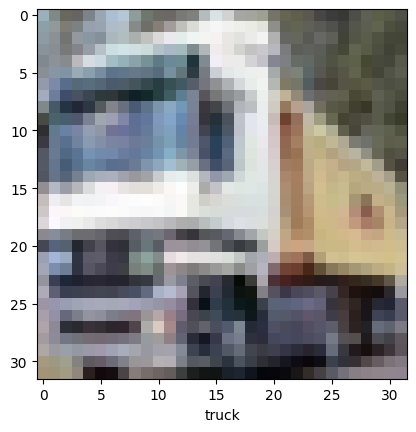

In [3]:
# LOOKING AT JUST ONE IMAGE
IMG_INDEX = 1 

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

BUILDING THE CONVOLUTIONAL BASE

LAYER 1: The input will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. 
We will also apply the function relu of each convolutional operation.

LAYER 2: This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

OTHER LAYERS: The next set of layers do very similar things but take as input the feature map from the previous layer.
They also increase frequency from 32 to 64. We do this so our data can shrink in spacial dimensions as it passed thought the layers,
meaning we can afford (computationally) to add more depth.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # layer 1
model.add(layers.MaxPooling2D((2, 2))) # layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # other layers
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\igorm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary() # looking at our model

# we see that the depth of our image increases, but the spatial dimensions reduce drastically. (cause we do without the padding) 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# ADDING THE DENSE LAYERS
# we just done the convolutional base. Now we are adding a way to classify these extracted features.

model.add(layers.Flatten()) # flatten take the last layer and put it on a straight line (to apply the dense layers)
model.add(layers.Dense(64, activation='relu')) # normal neuron dense layer
model.add(layers.Dense(10)) # output layer of 10 (representing the number of classes we have)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# TRAINING AND COMPILING THE MODEL
# we are using the recommended hyper parameters from TensorFlow

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=1,
                    validation_data=(test_images, test_labels))

Epoch 1/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 143s 3ms/step - accuracy: 0.4641 - loss: 1.5044 - val_accuracy: 0.5088 - val_loss: 1.4155
Epoch 2/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - accuracy: 0.5774 - loss: 1.2208 - val_accuracy: 0.5929 - val_loss: 1.1861
Epoch 3/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - accuracy: 0.6042 - loss: 1.1393 - val_accuracy: 0.5696 - val_loss: 1.2241
Epoch 4/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 138s 3ms/step - accuracy: 0.6225 - loss: 1.0978 - val_accuracy: 0.5731 - val_loss: 1.2452
Epoch 5/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 137s 3ms/step - accuracy: 0.6213 - loss: 1.0956 - val_accuracy: 0.6024 - val_loss: 1.1917
Epoch 6/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.6317 - loss: 1.0907 - val_accuracy: 0.5666 - val_loss: 1.2657
Epoch 7/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 140s 3ms/step - accuracy: 0.6314 - loss: 1.0891 - val_accuracy: 0.6050 - val_loss: 1.1859
Epoch 8/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 139s 3ms/step - ac

In [ ]:
# EVALUATING THE MODEL

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1, batch_size=1)
print(test_acc)

# accuracy of 60%. witch is not bad for a simple model, but can be better with some other approaches

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.5746 - loss: 1.2821
0.5733000040054321


WORKING WITH SMALL DATASETS

In the situation that we don't have enough data to train a accurate model, there is some solutions we can do to dribble that situation

#1 DATA AUGMENTATION 

To avoid overfitting and create a larger dataset from a smaller one, we can use this technique called data augmentation.
This is simply performing random transformations (compressions, rotations stretches and color changes) on our images so our model can perform better. 

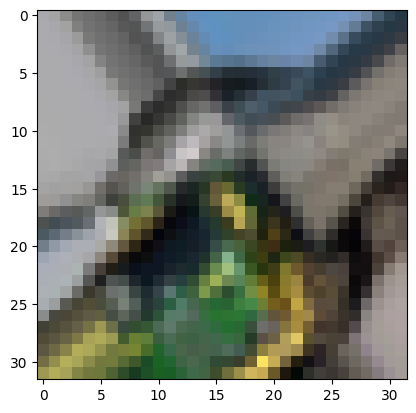

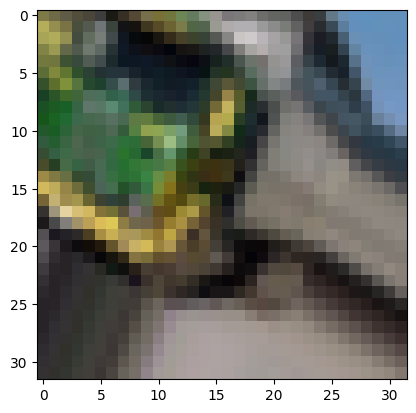

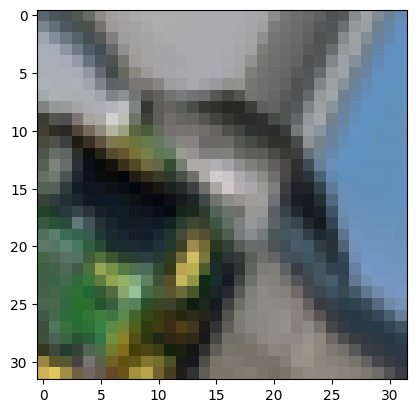

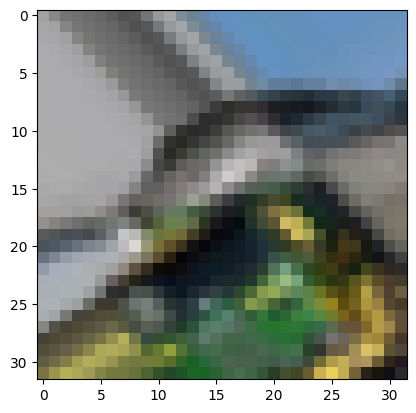

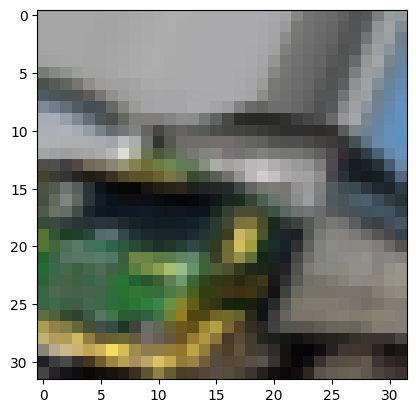

In [18]:
# fortunately keras can help us with data augmentation, like the below code

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creating a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# picking an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): # forever loop, that saves images to currently directory
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4: # show 4 images
        break
    
plt.show()

#2 PRETRAINED MODELS

**FEATURE EXTRACTION** is a way we can improve our model  where a pre-trained model is first adapted by freezing its base layers and training only the final layers.
That means we can use a pretrained CNN model (with no dense layers) trained with millions of images before, as a start of our model.
We will only need to add our own dense layered classifier at the end. 

**FINE TUNING** is a transfer learning technique used after a Feature extraction. Then, some or all of the base layers are unfrozen and retrained with a lower learning rate to better adjust the model to the new task. This allows the model to retain useful pre-learned features while refining them for specific data.

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
# LOADING THE DATASET 
# The data dataset is cats vs dogs, this dataset is a bunch of images of cats and dogs
# We will import the images already resizing them, and defining there batch size to 32
# https://www.tensorflow.org/tutorials/images/transfer_learning

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [124]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


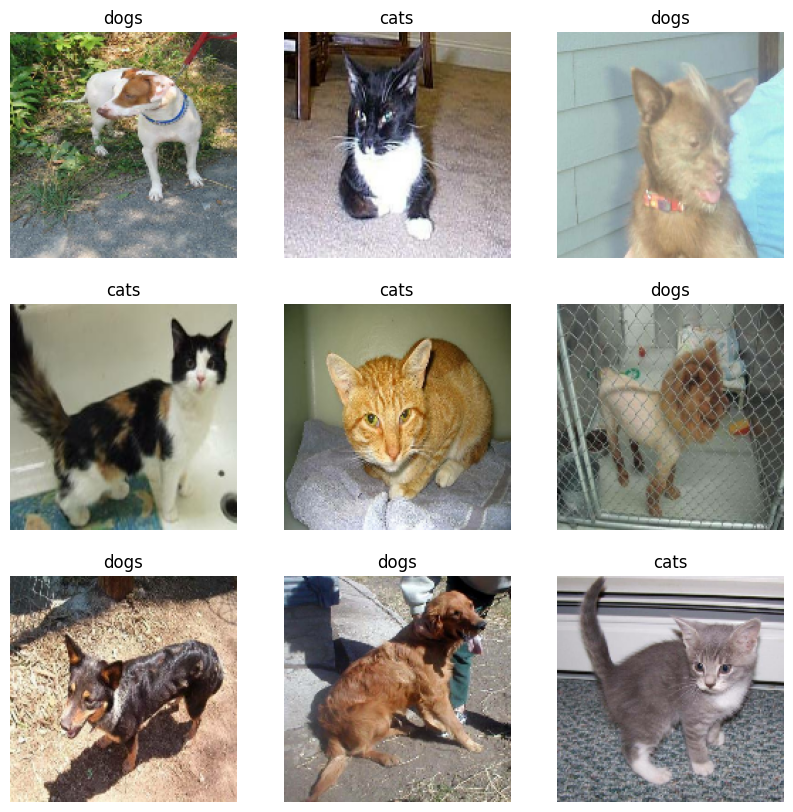

In [ ]:
# showing the firsts 9 images of the train dataset

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [125]:
# As the original dataset doesn't have a test set, we will create one moving 20% of the validation dataset

val_batches = tf.data.experimental.cardinality(validation_dataset) # determine how many batches the validation have
test_dataset = validation_dataset.take(val_batches // 5) # taking 20% of the validation to create the test dataset
validation_dataset = validation_dataset.skip(val_batches // 5) # removing the used test data 

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


In [126]:
# OPTIMIZING THE DATASET
# the Autotune adjust dynamically the quantity of data pre-search during the training to optimize the train

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# APPLIED DATA AUGMENTATION

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

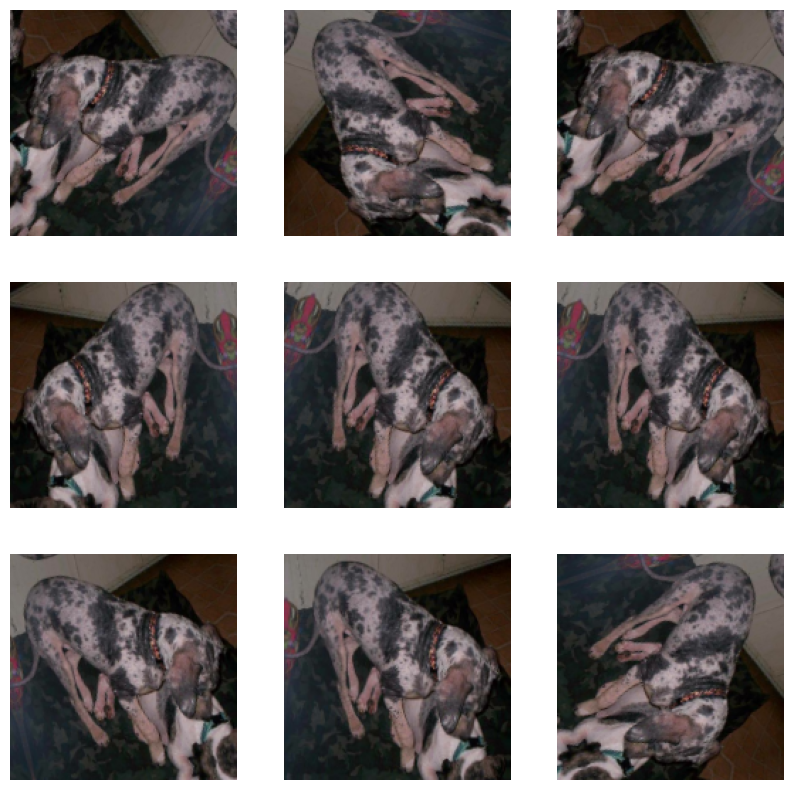

In [ ]:
# Visualizing the result of the data after the data augmentation technique

for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [127]:
# Rescaling the pixels of the images to be [-1, 1]

rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

IMG_SHAPE = IMG_SIZE + (3,) # setting the shape of the input to be (160 x 160 x 3) *3 colors channels (RGB)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, # using only the latest layers to finetune
                                               weights='imagenet')

In [ ]:
# this extractor converts the input 160x160x3 into a feature block of 5x5x1280
# because of the convolutional layers with strides and pooling will compress the image,
# but we will have 1280 filters to learn different visual characteristics

image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [133]:
# FREEZING THE CONVOLUTIONAL LAYER
# we will freeze the conv layers to prevent weights of the layers to be updated during training
# otherwise the updates applied to the non-trainable wights will destroy what the model has learned

base_model.trainable = False

In [135]:
#  ADDING A CLASSIFICATION HEAD
# Using a GlobalAveragePooling2D layer to convert the features into a single vector of 1280 elements per image.
# We use that because we need a simple vector, and not a matrix

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [136]:
# APPLYING THE DENSE LAYER
# Here we apply a dense layer with a single neuron to transform the 1280 filters into a single prediction

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [137]:
# PUTTING ALL THE NEW FEATURES INTO THE MODEL

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [138]:
# COMPILING THE MODEL

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

# The 2.5 million parameters in MobileNet are frozen, but there are 1.2 thousand trainable parameters in the Dense layer.
# These are divided between two tf.Variable objects, the weights and the biases.

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [142]:
# Seeing the first accuracy before the train

loss0, accuracy0 = model.evaluate(validation_dataset)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.5390 - loss: 0.7341
initial loss: 0.75
initial accuracy: 0.53


In [143]:
# TRAINING THE MODEL IN FACT

initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.5476 - loss: 0.7740 - val_accuracy: 0.6745 - val_loss: 0.5025
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.6959 - loss: 0.5227 - val_accuracy: 0.7921 - val_loss: 0.3647
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.7867 - loss: 0.4239 - val_accuracy: 0.8614 - val_loss: 0.2862
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.8455 - loss: 0.3492 - val_accuracy: 0.8985 - val_loss: 0.2407
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.8563 - loss: 0.3060 - val_accuracy: 0.9307 - val_loss: 0.2062
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.8846 - loss: 0.2719 - val_accuracy: 0.9406 - val_loss: 0.1761
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.8886 - loss: 0.2474 - val_accuracy: 0.9505 - val_loss: 0.1604
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.8912 - loss: 0.2410 - val_accu

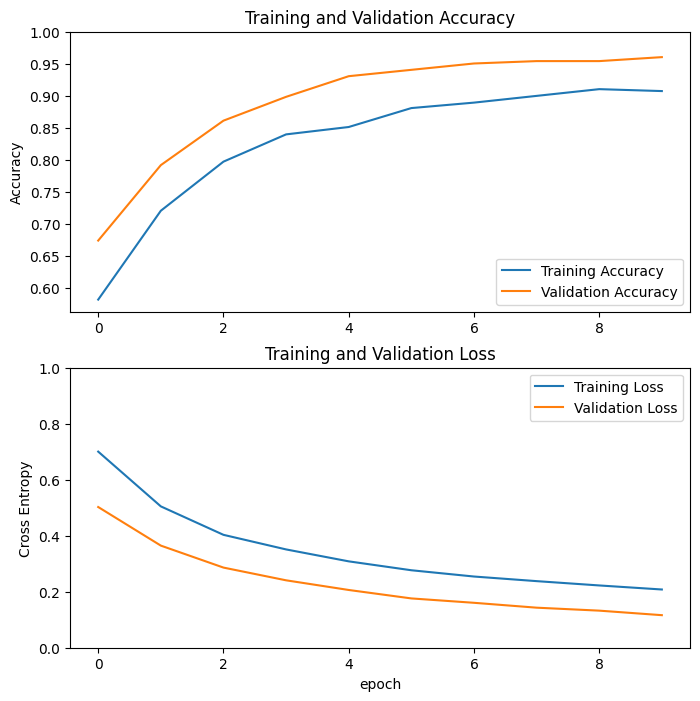

In [ ]:
# LEARNING CURVES
# Now is important to take a look at the training and validation accuracy/loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [146]:
# FINE TUNING 

# unfreezing the superiors layers
base_model.trainable = True

# see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [ ]:
# COMPILING THE MODEL AGAIN

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()
# Trainable params: 1,862,721 !! now we have way more trainable params

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,862,721 (7.11 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [148]:
# TRAINING THE MODEL (FINE TUNING)

fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 297ms/step - accuracy: 0.8495 - loss: 0.3660 - val_accuracy: 0.9802 - val_loss: 0.0754
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 0.8980 - loss: 0.2551 - val_accuracy: 0.9864 - val_loss: 0.0670
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.9158 - loss: 0.2122 - val_accuracy: 0.9839 - val_loss: 0.0571
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 0.9319 - loss: 0.1843 - val_accuracy: 0.9839 - val_loss: 0.0491
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 277ms/step - accuracy: 0.9320 - loss: 0.1638 - val_accuracy: 0.9814 - val_loss: 0.0558
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 277ms/step - accuracy: 0.9408 - loss: 0.1409 - val_accuracy: 0.9814 - val_loss: 0.0494
Epoch 16/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.9333 - loss: 0.1469 - val_accuracy: 0.9814 - val_loss: 0.0488
Epoch 17/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.9406 - loss: 0.1436 - 

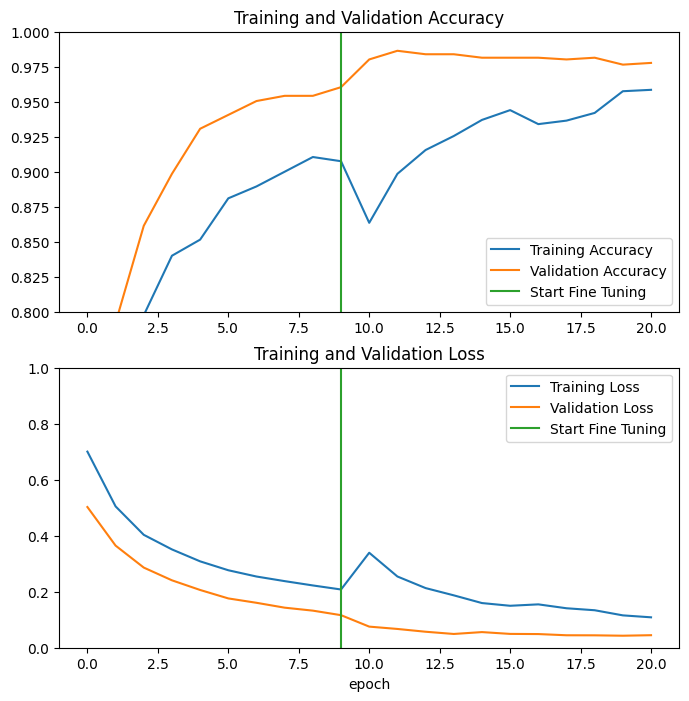

In [149]:
# FINAL RESULTS BEFORE AND AFTER FINE TUNING

acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [151]:
# EVALUATION AND PREDICTION
# Finally we can verify the performance of the model on the new test data

loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy: ', accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9653 - loss: 0.0507
Test accuracy:  0.96875


Predictions:
 [0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0]
Labels:
 [0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0]


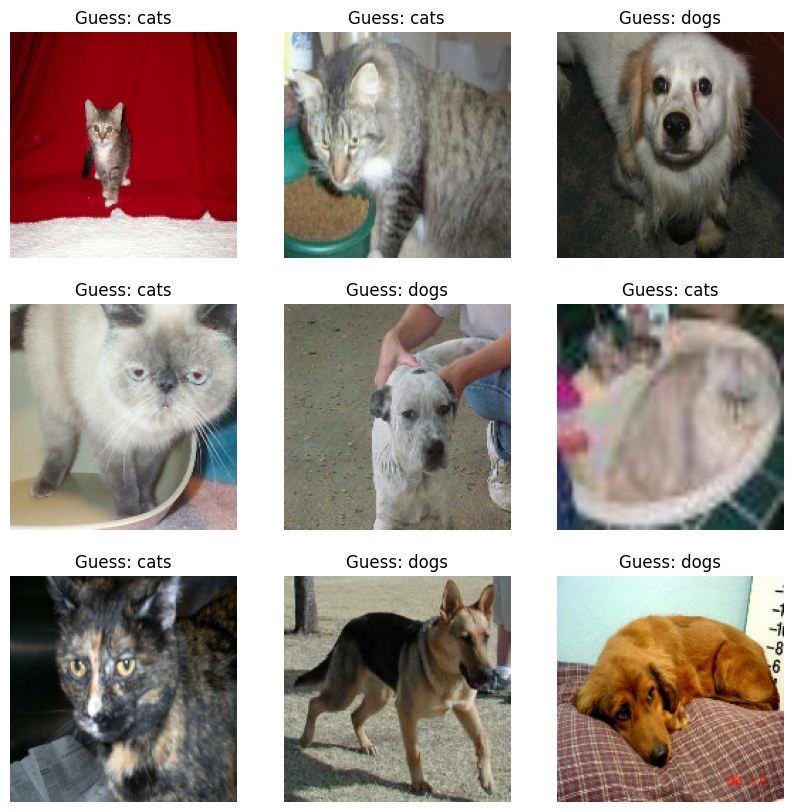

In [152]:
# USING THE MODEL TO MAKE PREDICTIONS

image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title("Guess: " + class_names[predictions[i]])
  plt.xlabel("Expected: " + class_names[label_batch[i]])
  plt.axis("off")